<a href="https://colab.research.google.com/github/Road2SKA/python_hpc_tutorial/blob/main/cupy_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some simple examples using cupy.

In [2]:
import numpy as np
import cupy as cp

Many of the same numpy functions are available in cupy and numpy

In [28]:
x_cpu = np.array([1, 2, 3])
l2_cpu = np.linalg.norm(x_cpu)
x_gpu = cp.array([1, 2, 3])
l2_gpu = cp.linalg.norm(x_gpu)

Cupy uses the concept of a **device**. If a node has more than one GPU, then arrays must be assigned to a specific GPU

In [ ]:
num_cuda = cp.cuda.runtime.getDeviceCount()
devices = []
for i in range(0, num_cuda):
    print(f'cuda:{i}')


We can also use the device deteciton to make code choose which device to use. GPU if available, otherwise CPU

In [26]:
import numpy as np
import cupy as cp

if cp.cuda.runtime.getDeviceCount() == 0:
  xp = np
else: xp = cp

x = xp.random.rand(50)

We can also create functions which check what array type they receive

In [ ]:
def softplus(x_in):
    xp = cp.get_array_module(x_in)  # 'xp' is a standard usage in the community
    print("Using:", xp.__name__)
    return xp.maximum(0, x_in) + xp.log1p(xp.exp(-abs(x_in)))

softplus(x)

We cannot add together cumpy and cupy arrays because they are on different devices. Numpy is on the CPU, Cupy is on the GPU

In [ ]:
z = x_cpu + x_gpu

We need to either move the cupy array to the CPU, or move the numpy array to the GPU

In [30]:
z_gpu = cp.asarray(x_cpu) + x_gpu
z_cpu = x_cpu + cp.asnumpy(x_gpu)

Can wrap all arguments to make sure that everything is on the same device

In [32]:
z_gpu = cp.asarray(x_cpu) + cp.asarray(x_gpu)
z_cpu = cp.asnumpy(x_cpu) + cp.asnumpy(x_gpu)

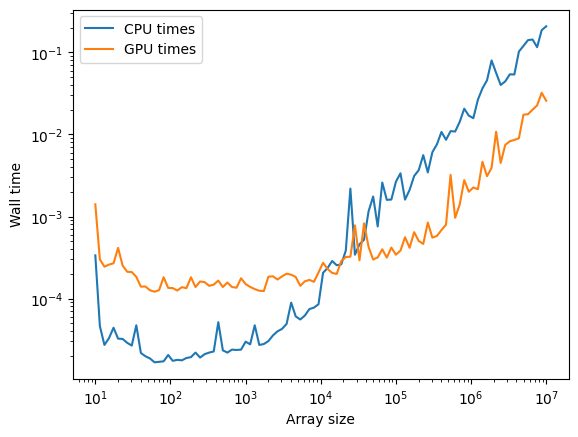

In [24]:
# it often takes more time to send data to the GPU than the CPU
%matplotlib inline
import time
import matplotlib.pyplot as plt
start = time.time()

N = np.logspace(1,7,100)#[1e2,1e3,1e4,1e5,1e6]
times_cpu = []
times_gpu = []
for n in N:
  t_cpu = time.time()
  x_cpu = np.random.rand(int(n))
  l2_cpu = np.linalg.norm(x_cpu)
  t_cpu = time.time() - t_cpu
  times_cpu.append(t_cpu)

  t_gpu = time.time()
  x_gpu = cp.array(x_cpu)
  l2_gpu = cp.linalg.norm(x_gpu)
  t_gpu = time.time() - t_gpu
  times_gpu.append(t_gpu)
plt.plot(N,times_cpu, label="CPU times")
plt.plot(N,times_gpu, label = "GPU times")
plt.xlabel("Array size")
plt.ylabel("Wall time")
plt.xscale('log')
plt.yscale('log')
plt.legend()

We can also do FFTs on the GPU with cupy

In [21]:
import cupy as cp
import cupyx.scipy.fft as cufft

a = cp.random.random(100).astype(cp.complex64)
b =cufft.fft2(a)

The 2D Fourier transform is often used for imaging and prediction in radio astronomy.

In [ ]:
import numpy as np

def ft2D(img):
    return np.fft.ifftshift(np.fft.fft2(np.fft.fftshift(img)))

def ift2D(img):
    return np.abs(np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(img))))

radio_galaxy_image = np.load("true_image_83.npy")
uv_coverage_eht = np.load("EHT_mask_150.npy")

# calculate the dirty beam and dirty image
beam_dirty_EHT = ift2D(uv_coverage_eht) # LINE 1
img_dirty_EHT = ift2D(ft2D(radio_galaxy_image)*uv_coverage_eht) # LINE 2

import matplotlib.pyplot as plt
fig,axs = plt.subplots(2,2)
plt.tight_layout()
axs=axs.flatten()
axs[0].imshow(radio_galaxy_image)
axs[0].set_title("Clean image")
axs[1].imshow(uv_coverage_eht)
axs[1].set_title("EHT UV coverage")
axs[2].imshow(beam_dirty_EHT)
axs[2].set_title("Dirty beam")
axs[3].imshow(img_dirty_EHT)
axs[3].set_title("Dirty image")


**Exercise 2**: reproduce the above cody using cupy instead of numpy. How does the timing compare when calculating the dirty beam and dirty image using numpy vs cupy?